In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/home/user/ml/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


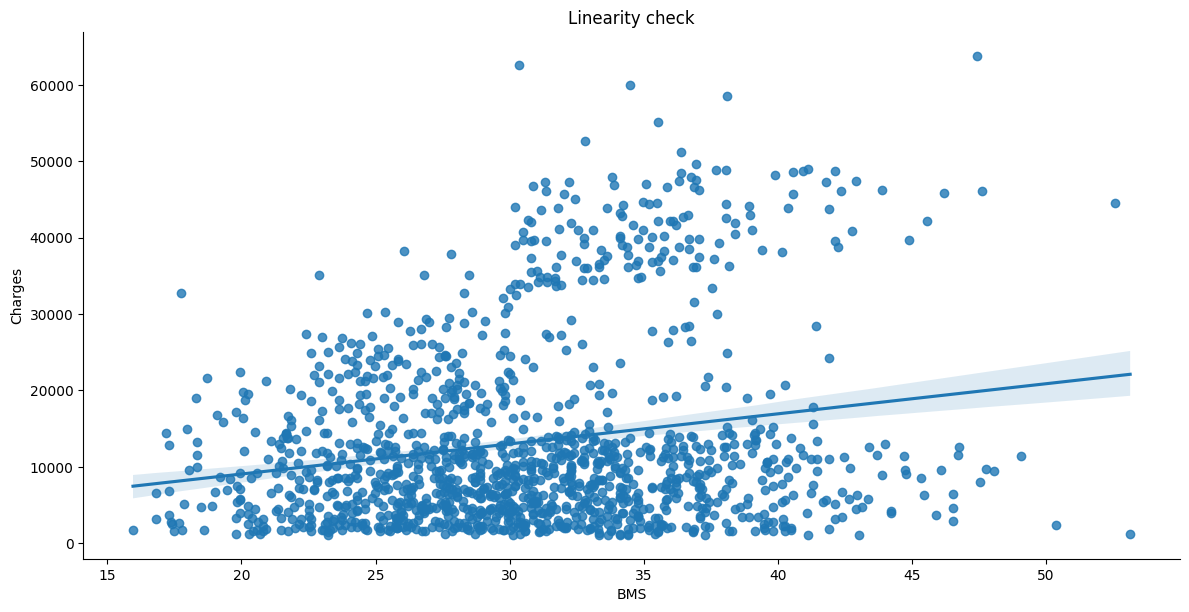

In [8]:
plt.rcParams['figure.figsize'] = [2,2]

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('BMS')
plt.ylabel('Charges')
plt.title('Linearity check');

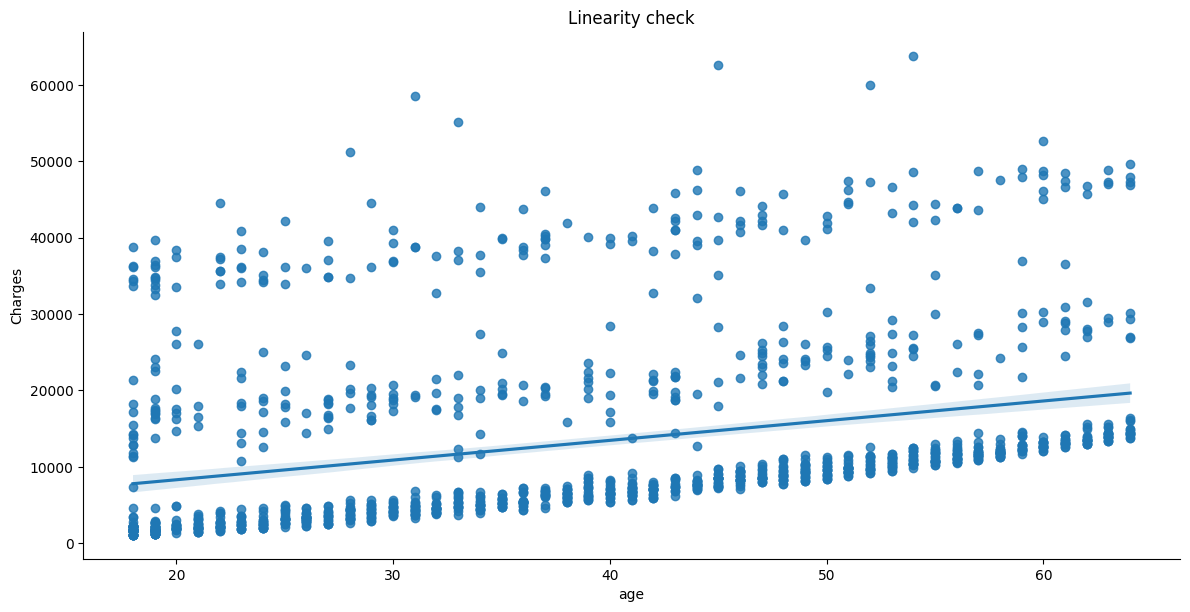

In [9]:
plt.rcParams['figure.figsize'] = [2,2]

sns.lmplot(x='age',y='charges',data=df,aspect=2,height=6)
plt.xlabel('age')
plt.ylabel('Charges')
plt.title('Linearity check');

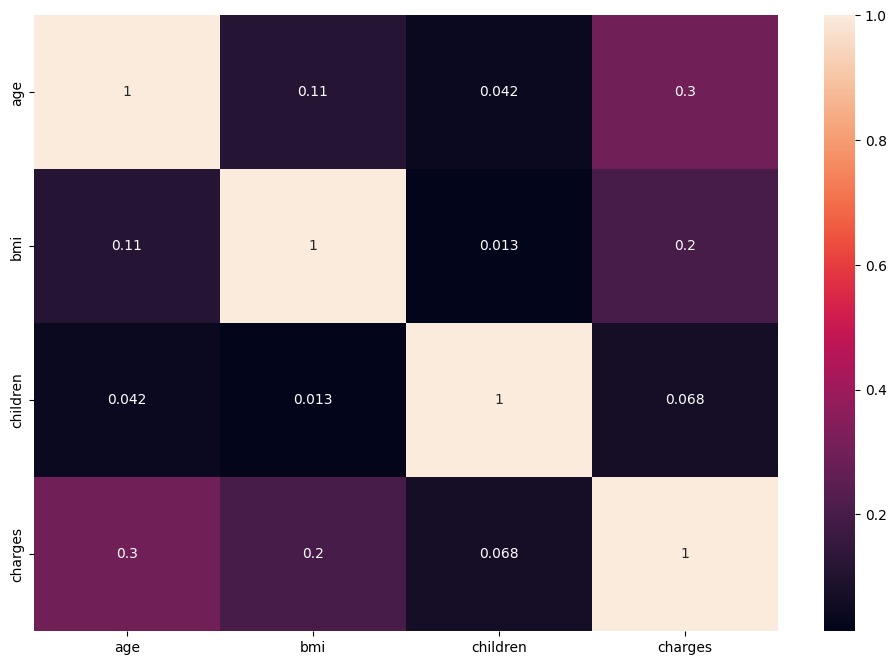

In [10]:
df1 = df.drop(columns=["sex",'smoker', 'region'])
plt.figure(figsize=(12, 8))
correlation = df1.corr()
sns.heatmap(correlation,  annot= True)
plt.show()


/tmp/ipykernel_7475/1011932783.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='y',ax=ax)
/tmp/ipykernel_7475/1011932783.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,color='g',ax=ax)


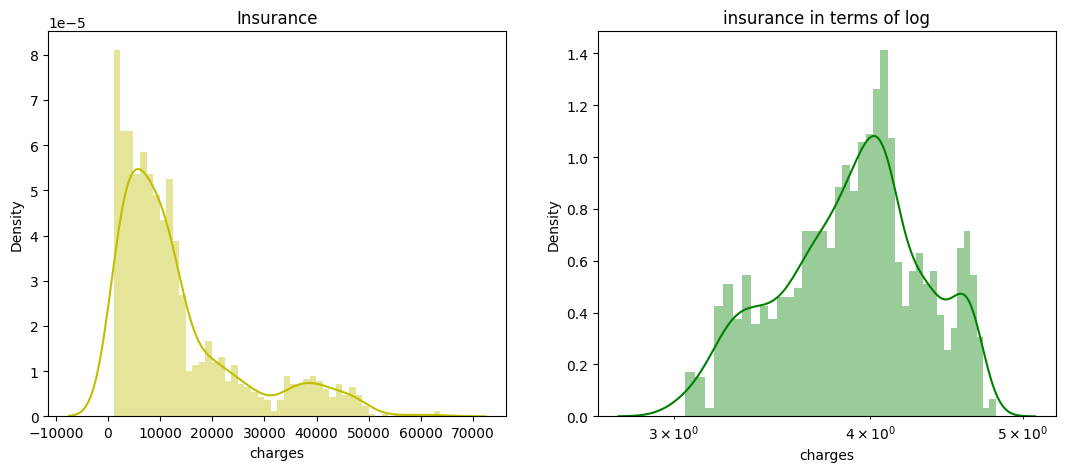

In [11]:
f= plt.figure(figsize=(13,5))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='y',ax=ax)
ax.set_title('Insurance')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='g',ax=ax)
ax.set_title('insurance in terms of log')
ax.set_xscale('log');

<Axes: xlabel='smoker', ylabel='charges'>

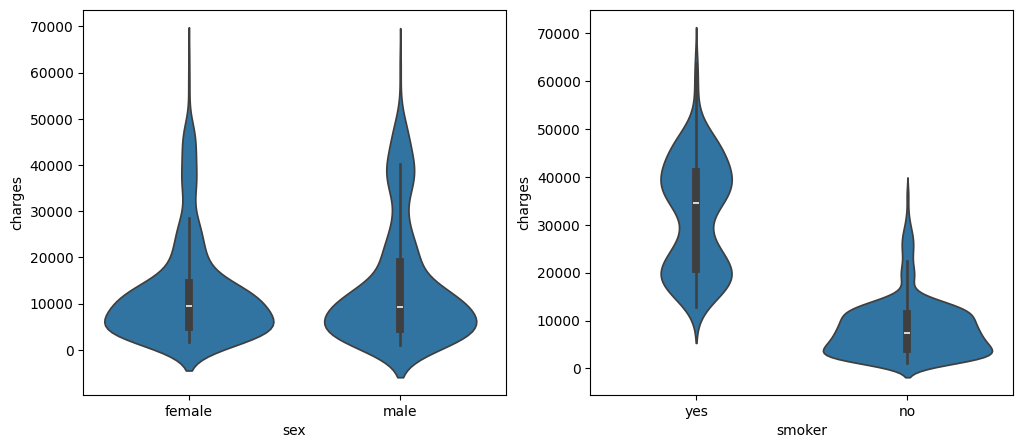

In [12]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,ax=ax)


ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,ax=ax)


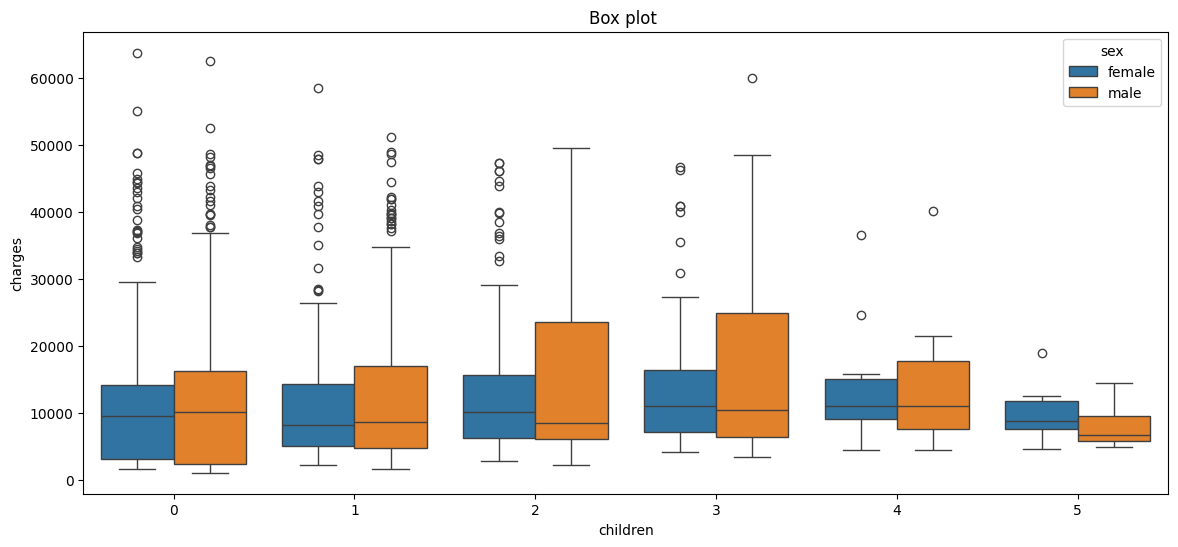

In [13]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df)
plt.title('Box plot ');

<Axes: xlabel='region', ylabel='charges'>

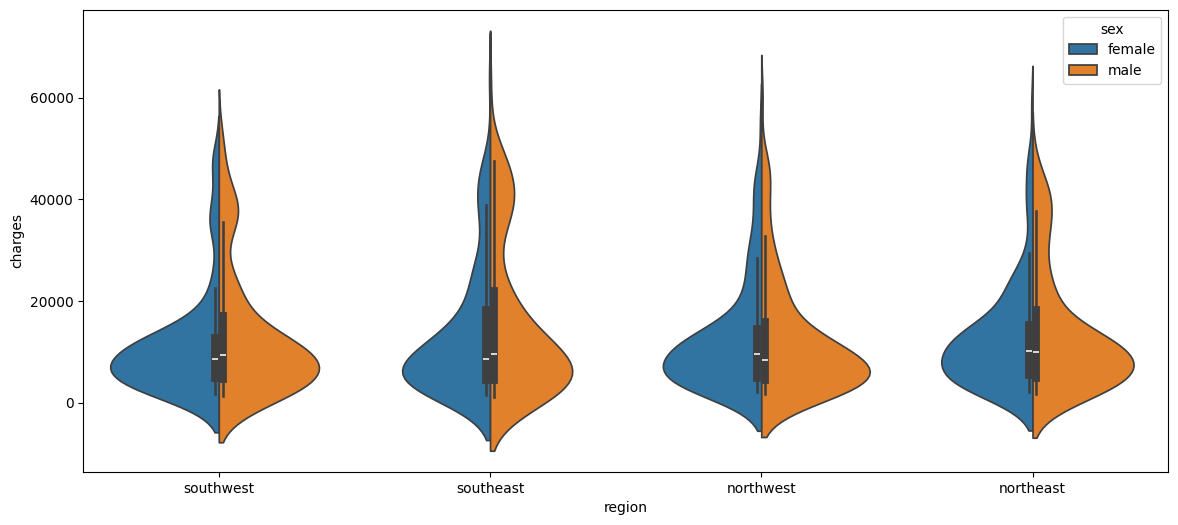

In [14]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,split=True)


In [15]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_cat = pd.get_dummies(data = df, prefix = 'cat', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [16]:
df_cat

,age,bmi,charges,cat_male,cat_1,cat_2,cat_3,cat_4,cat_5,cat_yes,cat_northwest,cat_southeast,cat_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [17]:
df_cat['charges'] = np.log(df_cat['charges'])

In [18]:

x = df_cat.drop('charges',axis=1)
y = df_cat['charges']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [19]:
print(x.shape)

(1338, 12)


In [20]:
X_train = sm.add_constant(X_train)  # Add a constant for the intercept

# Perform OLS regression
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     324.1
Date:                Tue, 23 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:53:57   Log-Likelihood:                -727.10
No. Observations:                1204   AIC:                             1480.
Df Residuals:                    1191   BIC:                             1546.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0639      0.077     91.809

In [21]:
# Function for Backward Regression
def backward_regression(x, y, significance_level=0.01):
    """Perform backward regression to remove insignificant variables."""
    while True:
        # Fit the model
        x = sm.add_constant(x)
        model = sm.OLS(y, x).fit()
        # Find the predictor with the highest p-value
        p_values = model.pvalues
        max_p_value = p_values.max()
        # If the highest p-value exceeds the significance level, drop the variable
        if max_p_value > significance_level:
            excluded_var = p_values.idxmax()  # Variable with highest p-value
            print(f"Removing {excluded_var} with p-value {max_p_value}")
            x = x.drop(columns=[excluded_var])
        else:
            break
    return model

# Perform backward regression
final_model = backward_regression(X_train, y_train)

Removing cat_northwest with p-value 0.033635340309299565


In [22]:

# Print the model summary
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     352.1
Date:                Tue, 23 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:53:59   Log-Likelihood:                -729.38
No. Observations:                1204   AIC:                             1483.
Df Residuals:                    1192   BIC:                             1544.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0260      0.075     93.727

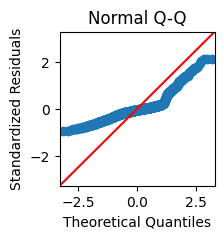

In [23]:
residuals = final_model.resid

sm.qqplot(residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q')
plt.show()

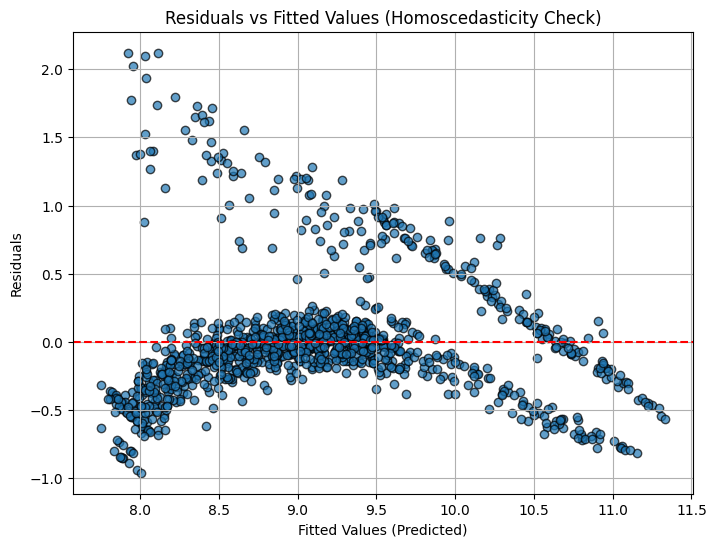

In [24]:
predicted_values = final_model.fittedvalues  # Predicted values from the model

# Scatter plot for residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.grid(True)
plt.show()

In [25]:
print(y_train.shape)

(1204,)


In [26]:
y_pred_train = model.predict(X_train)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_train)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.4426


In [27]:
print(X_train.shape)

(1204, 13)


In [28]:
print(X_test.shape)

(134, 12)


In [29]:

X_test = sm.add_constant(X_test)  # Add a constant for the intercept
y_pred_test = model.predict(X_test)


# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate RMSE
rmse = np.sqrt(mse_test)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.4268
